In [1]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  intercept = np.ones((len(features_X), 1))
  features_X = np.concatenate((intercept, features_X), axis=1)
  return features_X, sales_Y


In [2]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [4]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

  individual = [generate_random_value() for _ in range(n)]
  return individual

In [5]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [6]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    # Compute the loss for the given individual
    loss = compute_loss(individual)

    # Convert loss to fitness
    # Adding a small epsilon to avoid division by zero
    epsilon = 1e-10
    fitness = 1 / (loss + epsilon)

    return fitness

In [7]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001912541923e-06


In [8]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


   # Decide whether to perform crossover based on the crossover rate
    if random.random() < crossover_rate:
        # Ensure both individuals have the same length
        if len(individual1) != len(individual2):
            raise ValueError("Individuals must be of the same length for crossover.")

        # Iterate over each gene and decide whether to swap
        for i in range(len(individual1)):
            # With a 50% chance, swap the genes
            if random.random() < 0.5:
                individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]


    return individual1_new, individual2_new

In [9]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 4.82, -0.79, -2.41]
individual2:  [4.09, 2.57, 3.1, 4.02]


In [10]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            mutation_value = np.random.normal(0,1)
            individual_m[i] += mutation_value


    return individual_m

In [11]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [12]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [13]:
population = initializePopulation(100)
print(len(population))

100


In [14]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [17]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-3.868917883871256, 2.9721077307051837, -1.3584542998475935, -2.662663016253277]


In [18]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
          # Selection
          parent1 = selection(old_population, 100)
          parent2 = selection(old_population, 100)

          # Crossover
          child1, child2 = crossover(parent1, parent2, crossover_rate=0.9)

          # Mutation
          child1 = mutate(child1, mutation_rate=0.05)
          child2 = mutate(child2, mutation_rate=0.05)

          # Add offspring to the new population
          new_population.extend([child1, child2])

        # copy elitism chromosomes that have best fitness score to the next generation
          for ind in sorted_population[m-elitism:]:
             new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [20]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [21]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)
  return losses_list


In [22]:
losses_list = run_GA()

Best loss: 701.941363731104 with chromsome:  [-0.26242934056745604, 0.21738118080708024, 0.9607856519304425, -1.0448516912094352]
Best loss: 701.941363731104 with chromsome:  [-0.26242934056745604, 0.21738118080708024, 0.9607856519304425, -1.0448516912094352]
Best loss: 175.97016529293094 with chromsome:  [-3.8534121091304296, 0.17383372460212265, -0.5118826249043362, 0.12710500915889766]
Best loss: 175.97016529293094 with chromsome:  [-3.8534121091304296, 0.17383372460212265, -0.5118826249043362, 0.12710500915889766]
Best loss: 148.19989667093353 with chromsome:  [-3.8534121091304296, 0.17383372460212265, -0.29291673441113386, 0.12710500915889766]
Best loss: 148.19989667093353 with chromsome:  [-3.8534121091304296, 0.17383372460212265, -0.29291673441113386, 0.12710500915889766]
Best loss: 127.28074765818435 with chromsome:  [0.41727297813238795, 0.13378996169397067, -0.5118826249043362, 0.12710500915889766]
Best loss: 127.28074765818435 with chromsome:  [0.41727297813238795, 0.1337899

Best loss: 879.3869963570901 with chromsome:  [-3.8016700987082808, 0.0806750565394121, 1.829726936895536, -1.2132188600226745]
Best loss: 879.3869963570901 with chromsome:  [-3.8016700987082808, 0.0806750565394121, 1.829726936895536, -1.2132188600226745]
Best loss: 778.3736238714342 with chromsome:  [-4.992366443594722, 0.05893385604808121, -1.1443896761156591, 1.3022294183175243]
Best loss: 757.531293804567 with chromsome:  [-3.8016700987082808, 0.0806750565394121, 1.829726936895536, -0.8554901750746691]
Best loss: 757.531293804567 with chromsome:  [-3.8016700987082808, 0.0806750565394121, 1.829726936895536, -0.8554901750746691]
Best loss: 482.1023797670031 with chromsome:  [-4.992366443594722, 0.05893385604808121, 1.3215282891099587, -0.8554901750746691]
Best loss: 430.0676203756796 with chromsome:  [-3.8016700987082808, 0.0806750565394121, 1.2103684896945823, -0.8554901750746691]
Best loss: 428.9744803730145 with chromsome:  [-3.8016700987082808, 0.0806750565394121, 1.1722707576892

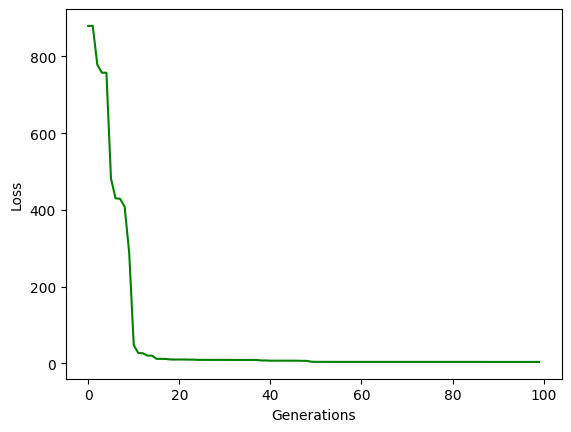

In [23]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

    plt.plot(losses_list, c='green')
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

[3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]


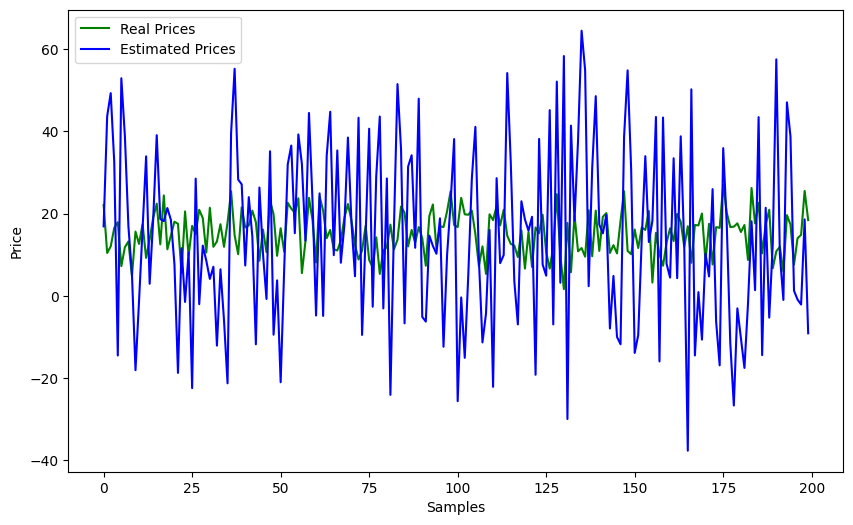

In [26]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     estimated_price = sum(c*x for x, c in zip(feature, theta))
     estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]


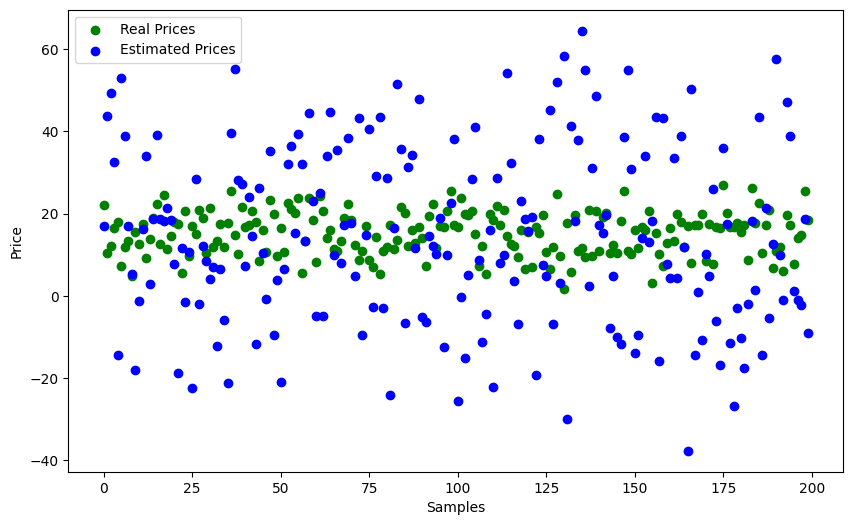

In [25]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()